In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xlrd.compdoc import x_dump_line

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

65536/57026 [==================================] - 0s 2us/step


In [9]:
print(x_train.shape)
print(len(x_train))
x_train

(404, 13)
404


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [10]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation="relu", input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=0)

In [13]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 32.4112 - mae: 4.2327


[32.411155700683594, 4.232675552368164]

<AxesSubplot:>

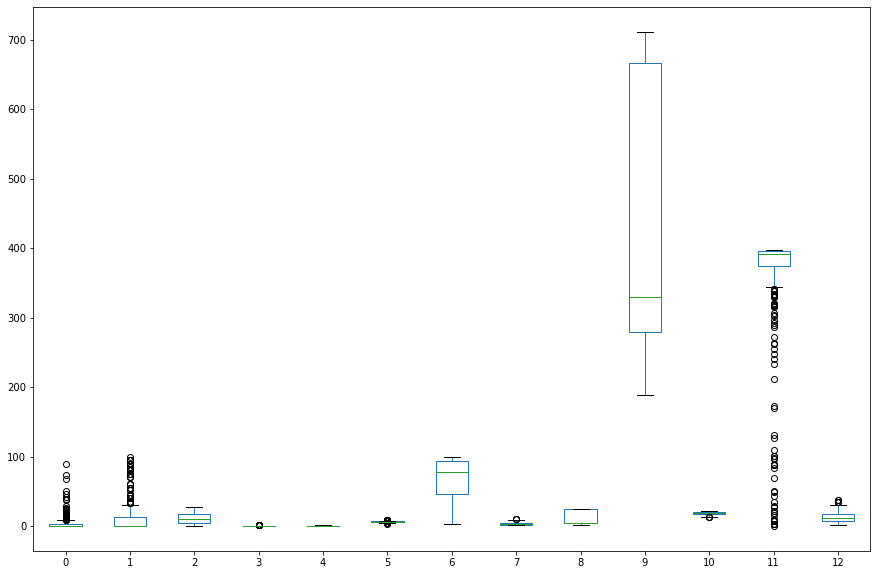

In [14]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.plot(kind="box", figsize=(15,10))

In [15]:
df_xtest = pd.DataFrame(x_test)
df_xtest.plot(kind="box", figsize=(15,10))

<AxesSubplot:>

In [16]:
df_xtrain_new = (df_xtrain-df_xtrain.mean())/df_xtrain.std()
df_xtrain_new

0         1         2         3         4         5         6   \
0   -0.271909 -0.483017 -0.435222 -0.256515 -0.165022 -0.176224  0.812055   
1   -0.402927  2.988079 -1.332260 -0.256515 -1.213677  1.892000 -1.907995   
2    0.124785 -0.483017  1.027052 -0.256515  0.627864 -1.827422  1.109113   
3   -0.400996 -0.483017 -0.868325 -0.256515 -0.361112 -0.324156 -1.235140   
4   -0.005627 -0.483017  1.027052 -0.256515  1.326967  0.153452  0.693948   
..        ...       ...       ...       ...       ...       ...       ...   
399 -0.381500 -0.483017 -0.615804 -0.256515 -0.932331 -0.937015 -0.250912   
400 -0.387740  0.358461 -0.608463 -0.256515 -0.795920 -0.038155 -1.886521   
401 -0.401532  0.989570 -0.740597 -0.256515 -1.018440 -0.332609 -1.635990   
402 -0.172706 -0.483017  1.244338 -0.256515  2.674020 -0.786266  1.055428   
403 -0.403726  2.041417 -1.200126 -0.256515 -1.333036  0.474675 -1.797045   

           7         8         9         10        11        12  
0    0.116554 -0.625474 -0.594433  1.147078  0.447522  0.824198  
1    1.246040 -0.855402 -0.348001 -1.716061  0.431371 -1.327556  
2   -1.185969  1.673810  1.563349  0.783505  0.220344 -1.306880  
3    1.105809 -0.510509 -1.093307  0.783505  0.447522 -0.652118  
4   -0.577856  1.673810  1.563349  0.783505  0.389399  0.263171  
..        ...       ...       ...       ...       ...       ...  
399  1.156247 -0.740438 -1.039213 -0.261768  0.447522  0.476830  
400  0.339240 -0.740438 -1.099318  0.056358  0.447522 -0.847857  
401  1.428632 -0.970366 -0.612465 -0.716235  0.079341 -0.676930  
402 -1.042782 -0.510509 -0.017422 -1.716061 -0.986421  0.420314  
403  1.221215 -0.970366 -0.846875 -1.307041  0.232882 -1.152494  

[404 rows x 13 columns]

<AxesSubplot:>

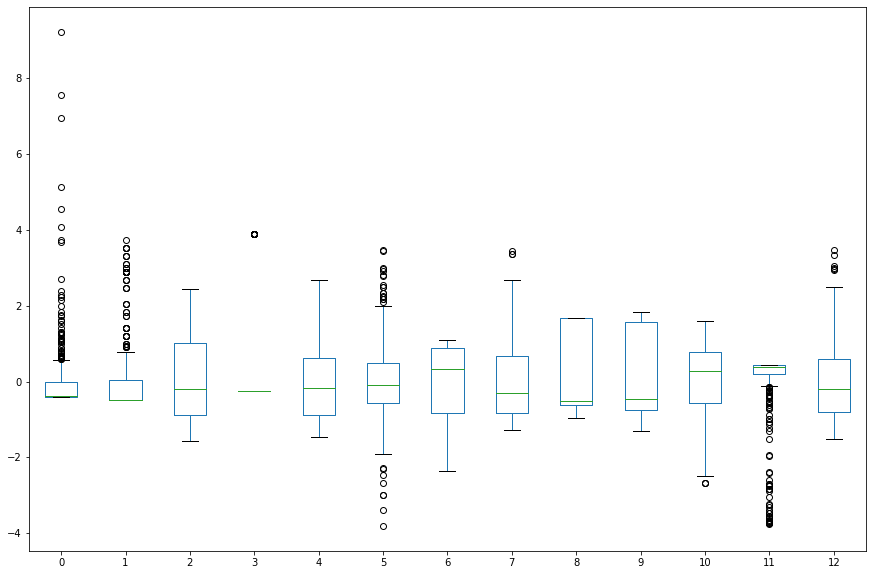

In [17]:
df_xtrain_new.plot(kind="box", figsize=(15,10))

In [18]:
df_xtest_new = (df_xtest-df_xtest.mean())/df_xtest.std()
df_xtest_new

0         1         2         3         4         5         6   \
0    2.790251 -0.505354  0.964844 -0.328070  1.225693  0.118755  1.141760   
1   -0.552577 -0.505354 -0.177142 -0.328070  0.025852 -0.656156  0.897227   
2   -0.565292 -0.505354 -0.857535 -0.328070 -0.265018 -0.549067 -0.738730   
3   -0.338516 -0.505354  1.173761  3.018245  0.553055 -0.154918  0.886895   
4   -0.562214 -0.505354 -0.956347 -0.328070 -0.864939 -0.346787 -0.346100   
..        ...       ...       ...       ...       ...       ...       ...   
97   0.071085 -0.505354  0.964844  3.018245  1.580191  3.608085  0.552815   
98  -0.560828 -0.505354  0.220930 -0.328070 -0.974015 -0.120709 -2.095713   
99  -0.234235 -0.505354  1.173761  3.018245  0.553055  2.153454  1.079765   
100 -0.508878 -0.505354 -0.714963  3.018245 -0.337736  0.887716  0.745686   
101 -0.031329 -0.505354  1.173761 -0.328070  0.553055 -0.376534  0.900671   

           7         8         9         10        11        12  
0   -0.914835  1.598200  1.400864  0.900683 -4.257271  2.500898  
1   -0.696891 -0.453755  0.081741 -0.283459  0.389023  0.583163  
2    0.336230 -0.567752 -1.090814  0.900683  0.413664 -0.383172  
3   -0.930087 -0.567752 -0.081741 -1.812974 -0.318977 -1.016443  
4   -0.111086 -0.795747 -0.961156  0.061916  0.391551 -0.577335  
..        ...       ...       ...       ...       ...       ...  
97  -0.885423  1.598200  1.400864  0.900683 -0.121475 -1.047807  
98   0.100639 -0.567752 -0.109927  0.160594  0.388644 -0.825267  
99  -0.828279 -0.567752 -0.081741 -1.812974  0.321547 -1.551138  
100 -0.483317 -0.225760 -0.622920 -0.480816  0.347956 -0.387653  
101 -0.726303 -0.567752 -0.081741 -1.812974 -1.566919 -0.372717  

[102 rows x 13 columns]

<AxesSubplot:>

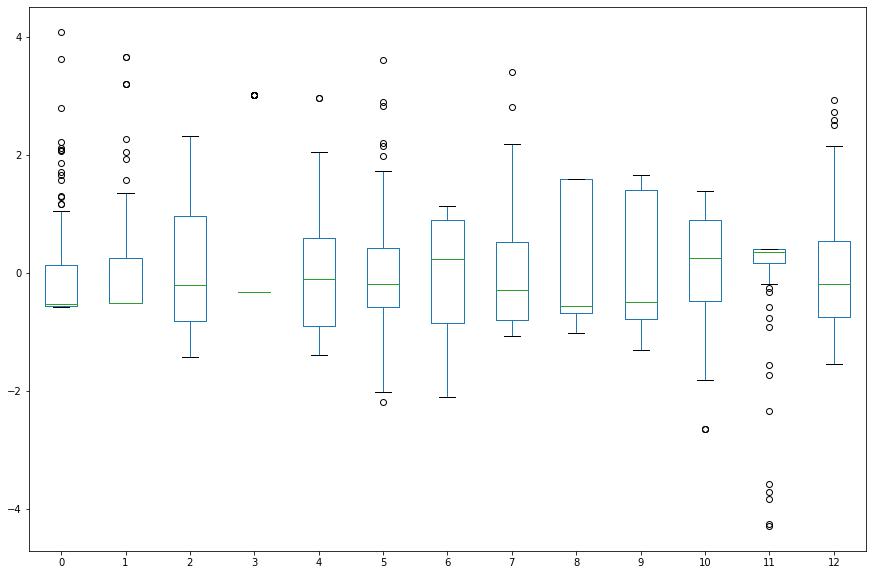

In [19]:
df_xtest_new.plot(kind="box", figsize=(15,10))

In [20]:
x_train = df_xtrain_new.to_numpy()
x_test = df_xtest_new.to_numpy()
model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=0)

In [21]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 667us/step - loss: 19.1945 - mae: 2.9052


[19.194456100463867, 2.905249834060669]